# Visualisering af Grupperede data

In [16]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

# Find alle Excel-filer i en mappe
filer = glob.glob("/Users/mathias/Desktop/Uni/4. Semester/Dataprojekt/Rådata/2023 AAR vaskeri data/PLC*.xlsx")

# Indlæs alle filer og saml dem i en liste
dataframes = [pd.read_excel(fil, skiprows=2) for fil in filer]

# Eventuelt kombiner alle til én DataFrame
samlet_df = pd.concat(dataframes, ignore_index=True)

# Metode 1: Prioriteret matching (bedste metode)
def kategoriser_produkt(produktnavn):
    produktnavn = str(produktnavn).lower()
    
    # Tjek i prioriteret rækkefølge (mest specifik først)
    if any(ord in produktnavn for ord in ['forklæde', 'forkl']):
        return 'Forklæde'
    elif 'shorts' in produktnavn:
        return 'Shorts'
    elif any(ord in produktnavn for ord in ['sweat', 'fleece', 'ziptrøje']):
        return 'Sweatshirt'
    elif any(ord in produktnavn for ord in ['t-shirt', 'polo', 'tshirt']):
        return 'T-shirt'
    elif 'kittel' in produktnavn or re.search(r'\bkit[\s\.]', produktnavn):
        return 'Kittel'
    elif any(ord in produktnavn for ord in ['skjorte', 'skj.']):
        return 'Skjorte'
    elif any(ord in produktnavn for ord in ['jakke', 'vest', 'jak', 'jk']):
        return 'Jakke'
    elif any(ord in produktnavn for ord in ['buks', 'benk', 'benklæder', 'unisexben', 'jeans']):
        return 'Bukser'
    elif 'overall' in produktnavn or 'kedeldr' in produktnavn or 'heldragt' in produktnavn:
        return 'Overall'
    elif any(ord in produktnavn for ord in ['kokkebuss', 'busseron', 'halvbusseron']):
        return 'Busseron'
    else:
        return 'Andet'

# Tilføj kategori
samlet_df['Kategori'] = samlet_df['Produkt - Produkt'].apply(kategoriser_produkt)

# Nu kan du filtrere uden overlap
skjorte_df = samlet_df[samlet_df['Kategori'] == 'Skjorte']
shorts_df = samlet_df[samlet_df['Kategori'] == 'Shorts']
buks_df = samlet_df[samlet_df['Kategori'] == 'Bukser']
tshirt_df = samlet_df[samlet_df['Kategori'] == 'T-shirt']
sweatshirt_df = samlet_df[samlet_df['Kategori'] == 'Sweatshirt']
jakke_df = samlet_df[samlet_df['Kategori'] == 'Jakke']
forklæde_df = samlet_df[samlet_df['Kategori'] == 'Forklæde']
kittel_df = samlet_df[samlet_df['Kategori'] == 'Kittel']
busseron_df = samlet_df[samlet_df['Kategori'] == 'Busseron']
andre_df = samlet_df[samlet_df['Kategori'] == 'Andet']

# Tjek resultater
print(samlet_df['Kategori'].value_counts())

# udregn hvor mange procent er katogriseret i alt som ikke er i "Andet"
total_kategoriseret = samlet_df[samlet_df['Kategori'] != 'Andet'].shape[0]
total_antal = samlet_df.shape[0]
procent_kategoriseret = (total_kategoriseret / total_antal) * 100
print(f"Procent kategoriseret (ikke 'Andet'): {procent_kategoriseret:.2f}%")


Kategori
Bukser        77905
T-shirt       75396
Jakke         25501
Skjorte       18147
Sweatshirt    13675
Overall       11763
Andet         10818
Busseron       7255
Forklæde       3360
Kittel         2868
Shorts         2023
Name: count, dtype: int64
Procent kategoriseret (ikke 'Andet'): 95.65%


## Alle kasseringsårsager for en specifik gruppe

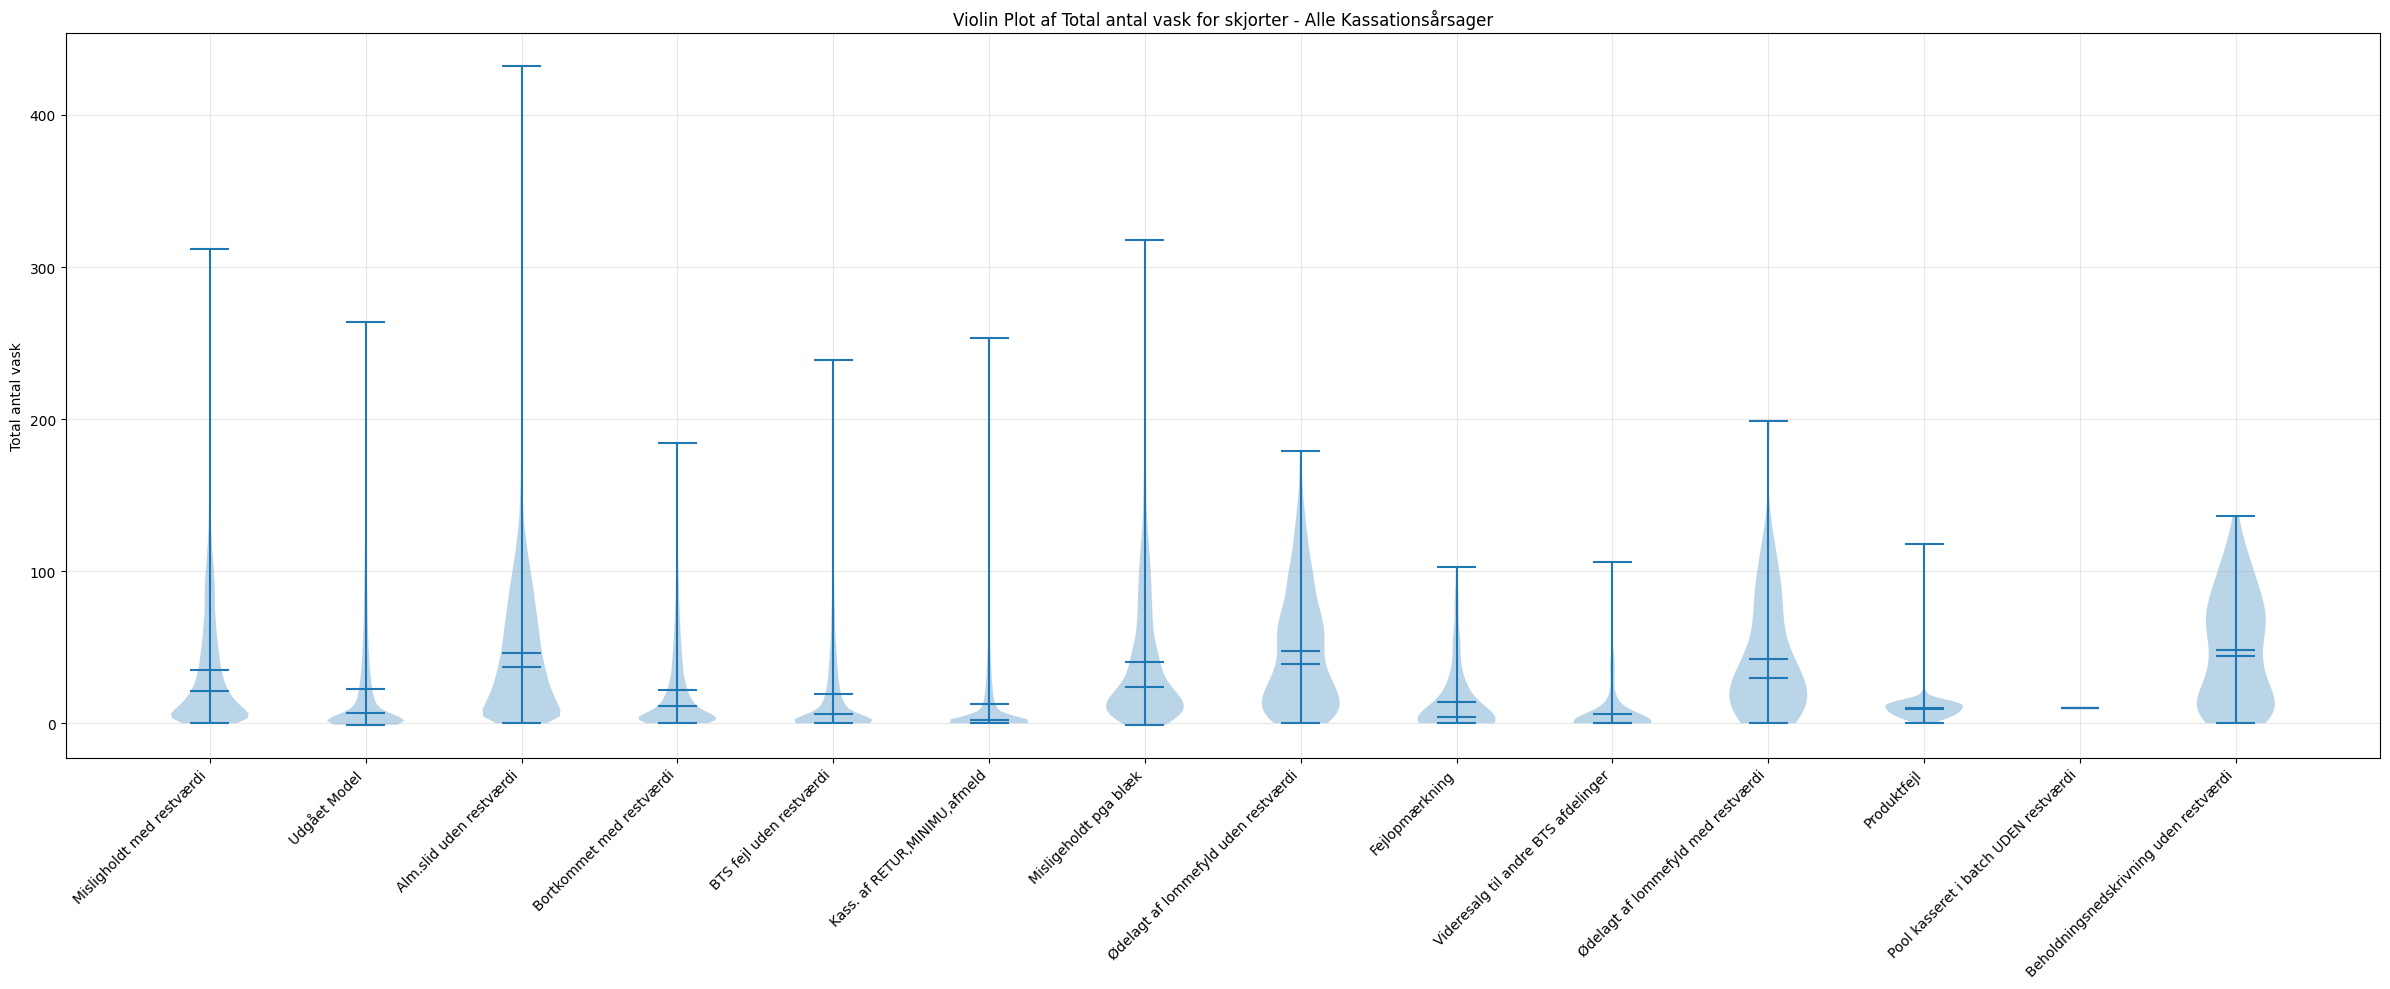

In [18]:
kassationsårsager = skjorte_df['Kassationsårsag (ui)'].unique()

# Lav violin plot for antal vaske for alle produkter oghver kassationsårsag i én figur
data_list = []
labels = []
for årsag in kassationsårsager:
    data = samlet_df[samlet_df['Kassationsårsag (ui)'] == årsag]['Total antal vask']
    if len(data) > 0:  # Kun inkluder hvis der er data
        data_list.append(data)
        labels.append(årsag)
# Opret figur
fig, ax = plt.subplots(figsize=(24, 10))
# Lav violin plots
parts = ax.violinplot(data_list, showmeans=True, showmedians=True)
# Tilpas udseende
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Total antal vask')
ax.set_title('Violin Plot af Total antal vask for skjorter - Alle Kassationsårsager')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pie chart over kategorisering af data

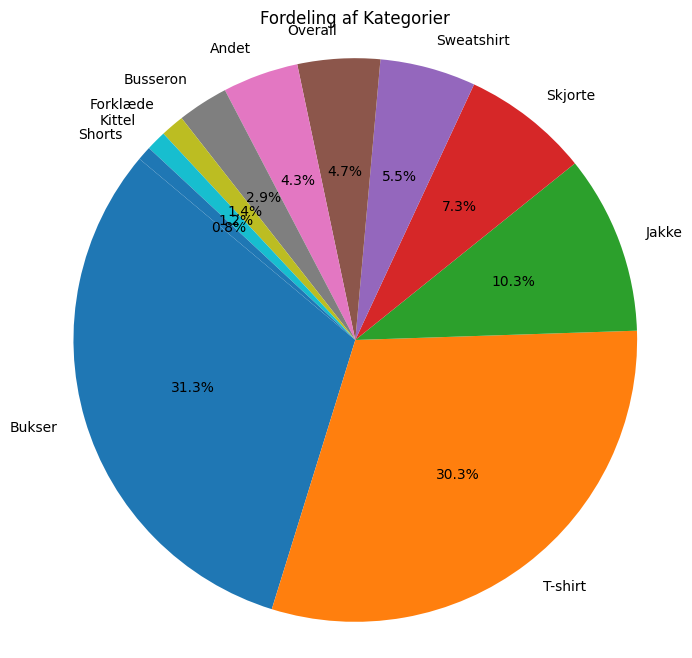

In [19]:
# Lav et pie chart over fordelingen af kategorier
kategori_counts = samlet_df['Kategori'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fordeling af Kategorier')
plt.axis('equal')  # Sørg for at pie chart er cirkulært
plt.show()